<a href="https://colab.research.google.com/github/aswwwin/Global_temperature_prediction_modal/blob/main/Global_temperature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Read the dataset
df = pd.read_csv('/content/city_temperature.csv')

# Basic data preprocessing
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']].assign(Day=1))

1. What is the overall trend in global average temperature from 1995 to 2020 and also Are there any significant spikes or drops in temperature during this period?

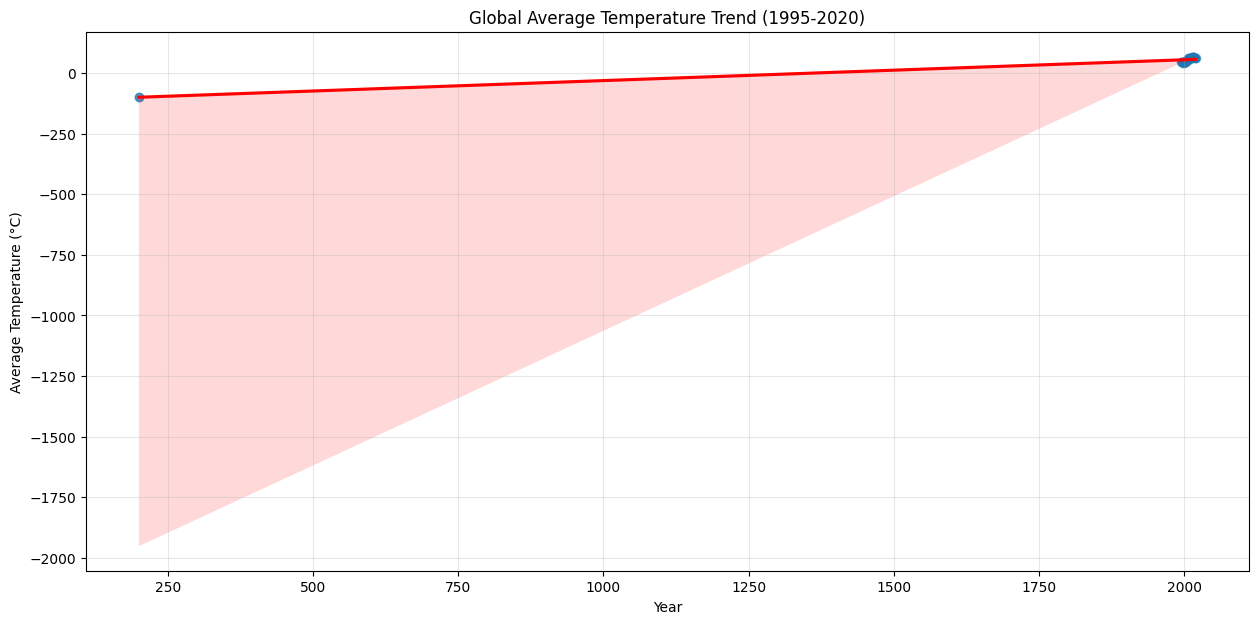

In [ ]:
def plot_global_temp_trends():
    yearly_avg = df.groupby('Year')['AvgTemperature'].mean().reset_index()

    plt.figure(figsize=(15, 7))
    sns.regplot(data=yearly_avg, x='Year', y='AvgTemperature',
                scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    plt.title('Global Average Temperature Trend (1995-2020)')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature (°C)')
    plt.grid(True, alpha=0.3)
    plt.show()

# Display the visualization
plot_global_temp_trends()

2. Which region shows the highest median temperature and
How does temperature variability differ between regions?

<ipython-input-22-33818c735dc6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




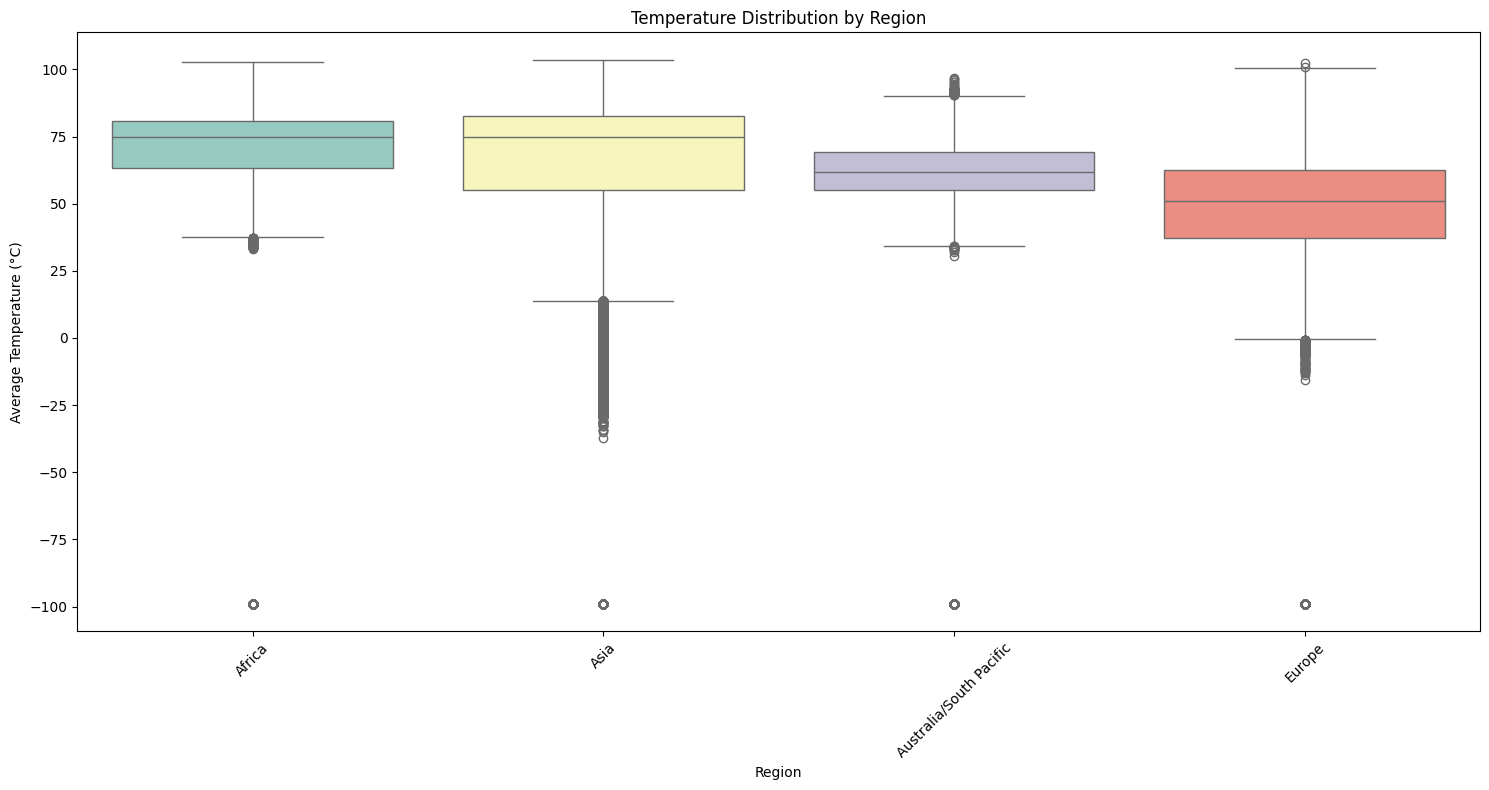

In [ ]:
def plot_temp_by_region():
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, x='Region', y='AvgTemperature', palette='Set3')
    plt.title('Temperature Distribution by Region')
    plt.xticks(rotation=45)
    plt.xlabel('Region')
    plt.ylabel('Average Temperature (°C)')
    plt.tight_layout()
    plt.show()

# Display the visualization
plot_temp_by_region()

3. Which region experiences the most extreme temperature variations throughout the year and When do different regions experience their peak temperatures?

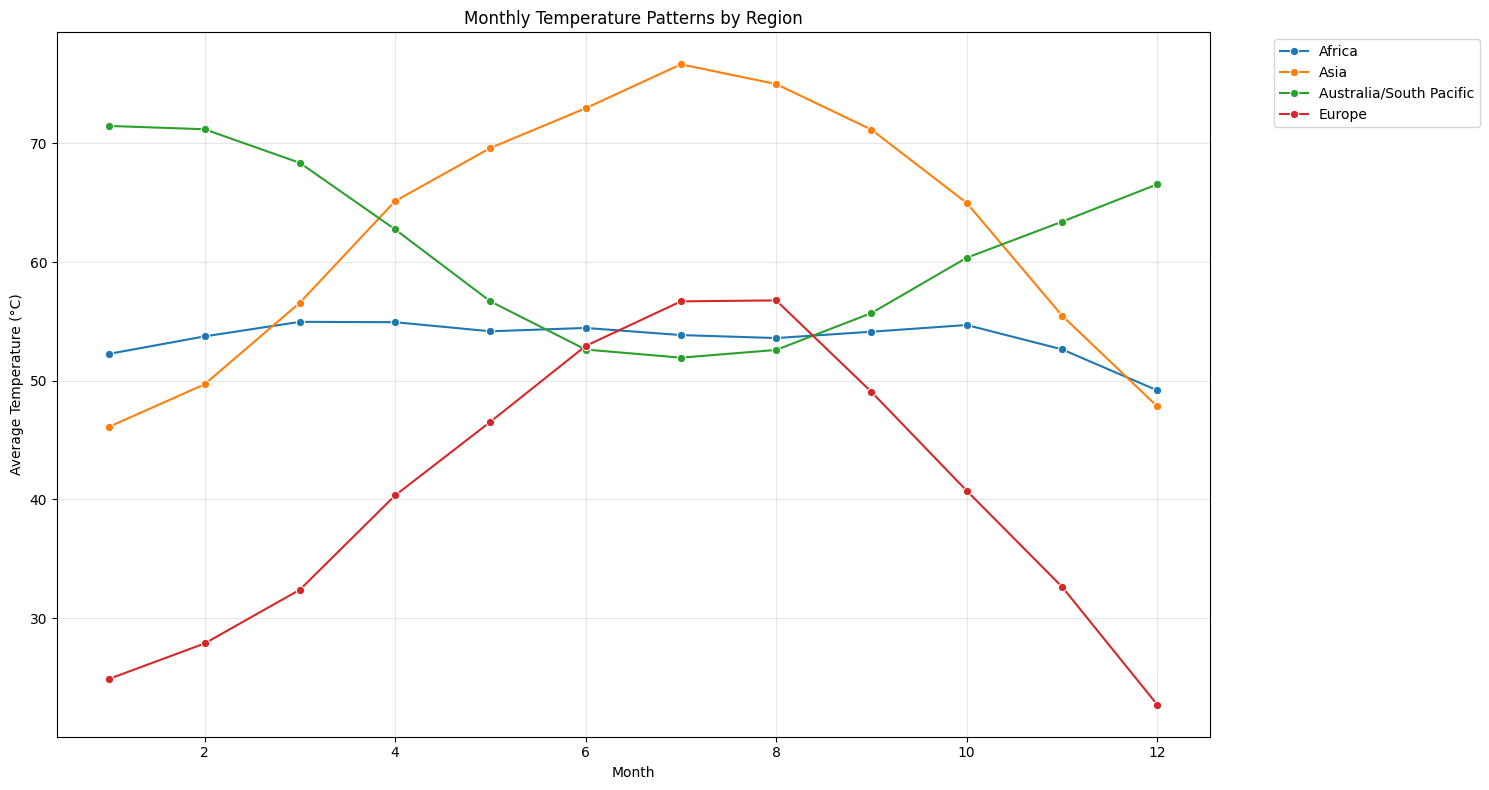

In [ ]:
def plot_monthly_patterns():
    monthly_avg = df.groupby(['Month', 'Region'])['AvgTemperature'].mean().reset_index()

    plt.figure(figsize=(15, 8))
    sns.lineplot(data=monthly_avg, x='Month', y='AvgTemperature',
                 hue='Region', marker='o')
    plt.title('Monthly Temperature Patterns by Region')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (°C)')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Display the visualization
plot_monthly_patterns()

4. Which cities consistently show higher temperatures throughout the year and Which months show the most extreme temperatures across cities?

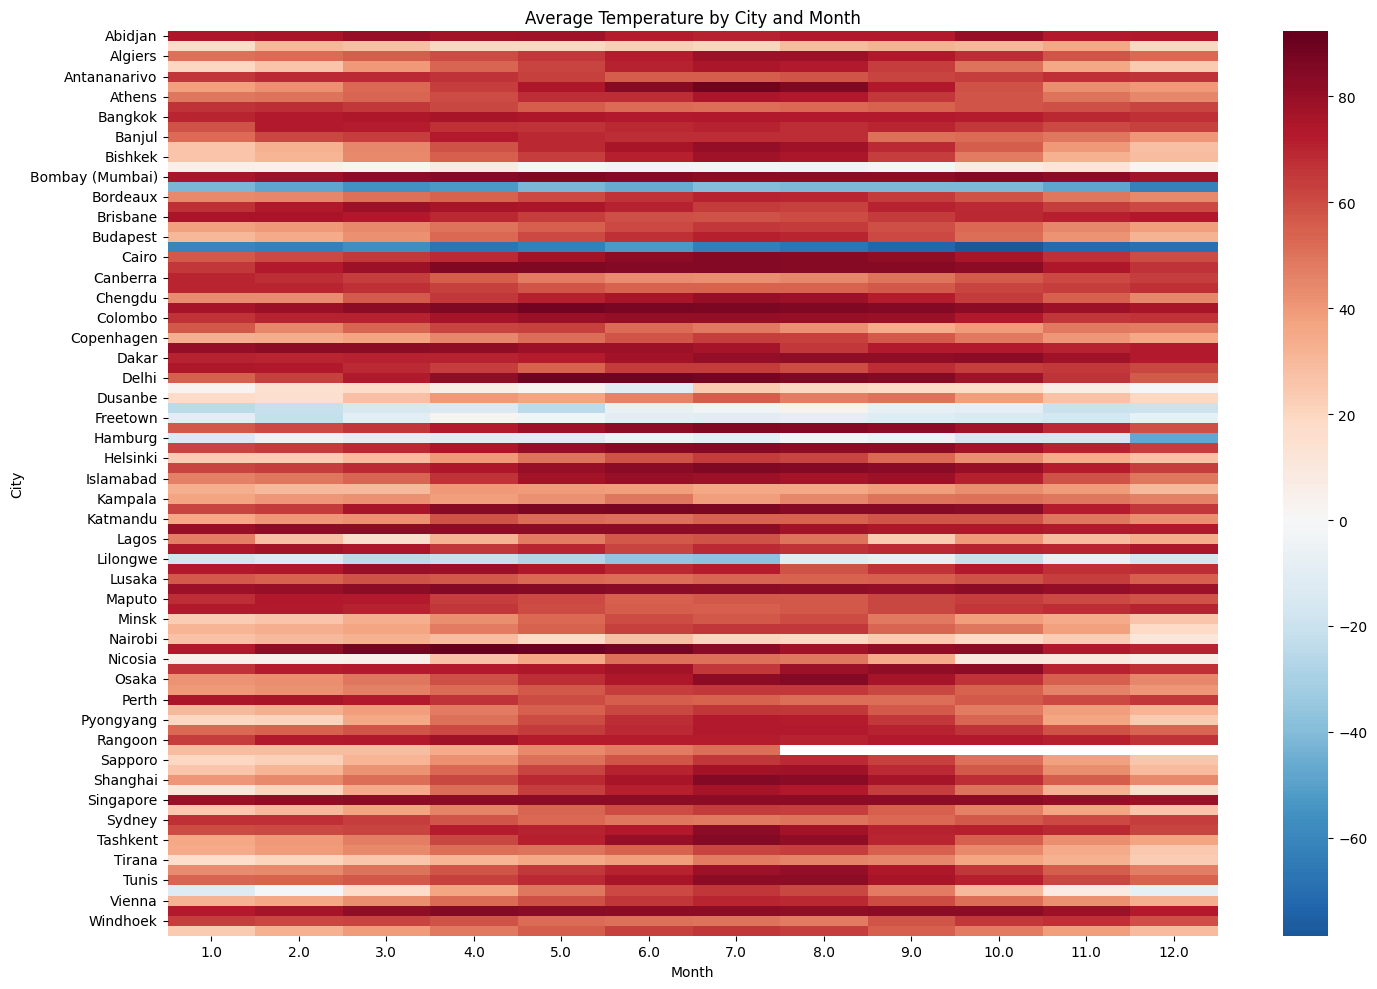

In [ ]:
def plot_city_temp_heatmap():
    city_month_temp = df.pivot_table(
        values='AvgTemperature',
        index='City',
        columns='Month',
        aggfunc='mean'
    )

    plt.figure(figsize=(15, 10))
    sns.heatmap(city_month_temp, cmap='RdBu_r', center=0)
    plt.title('Average Temperature by City and Month')
    plt.xlabel('Month')
    plt.ylabel('City')
    plt.tight_layout()
    plt.show()

# Display the visualization
plot_city_temp_heatmap()

5. What is the range of temperatures experienced in each season by region and
Are there any unusual patterns in seasonal transitions?

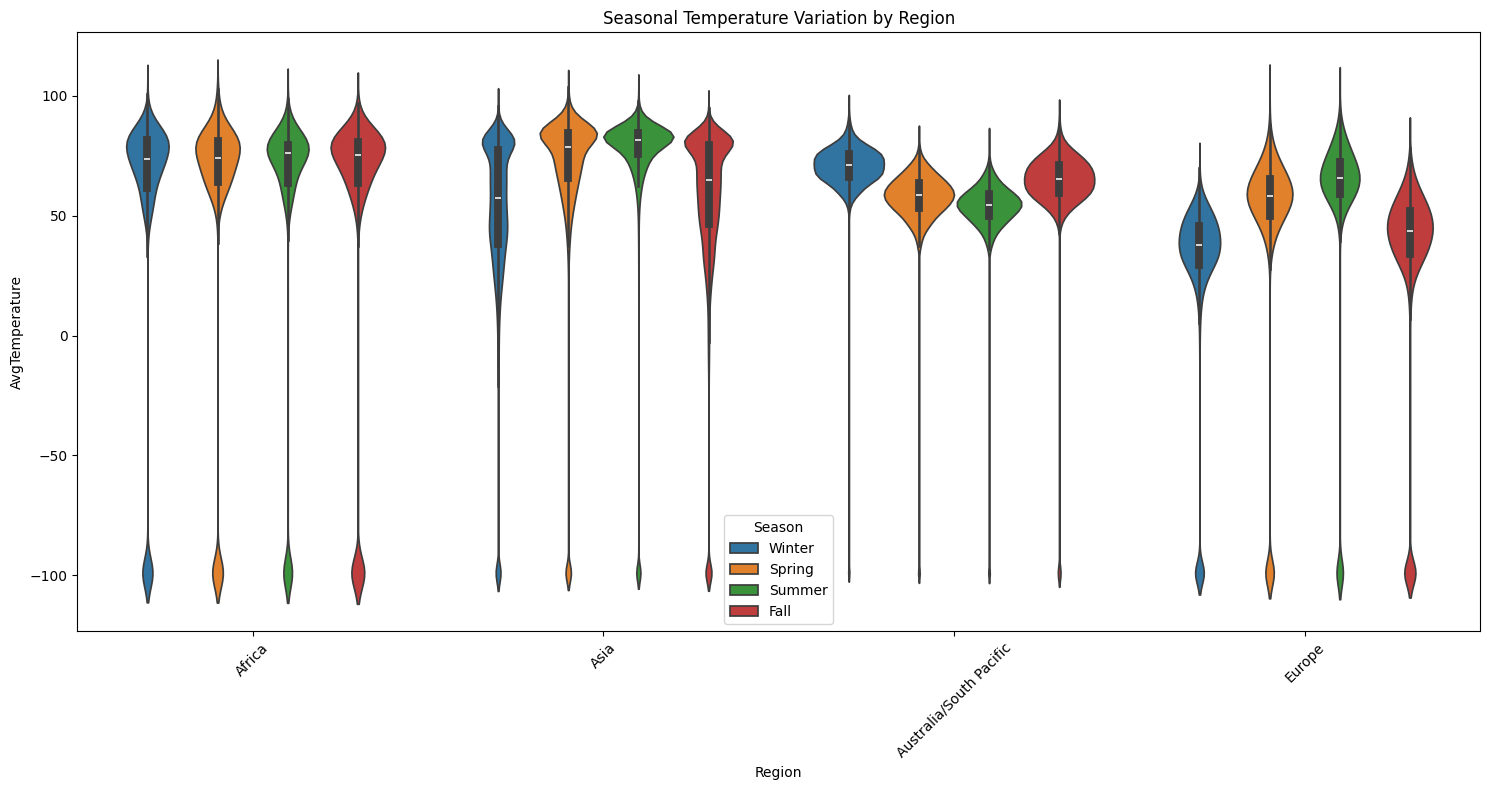

In [ ]:
def plot_seasonal_variation():
    # Create season column
    df['Season'] = pd.cut(df['Month'], bins=[0,3,6,9,12],
                         labels=['Winter', 'Spring', 'Summer', 'Fall'])

    plt.figure(figsize=(15, 8))
    sns.violinplot(data=df, x='Region', y='AvgTemperature', hue='Season')
    plt.title('Seasonal Temperature Variation by Region')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Display the visualization
plot_seasonal_variation()

6. What are the maximum and minimum temperature extremes recorded and Is there a trend in average temperatures over the years?

In [ ]:
def plot_temperature_extremes():
    yearly_extremes = df.groupby('Year').agg({
        'AvgTemperature': ['min', 'max', 'mean']
    }).reset_index()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=yearly_extremes['Year'],
                            y=yearly_extremes['AvgTemperature']['max'],
                            name='Maximum', mode='lines+markers'))
    fig.add_trace(go.Scatter(x=yearly_extremes['Year'],
                            y=yearly_extremes['AvgTemperature']['mean'],
                            name='Average', mode='lines+markers'))
    fig.add_trace(go.Scatter(x=yearly_extremes['Year'],
                            y=yearly_extremes['AvgTemperature']['min'],
                            name='Minimum', mode='lines+markers'))

    fig.update_layout(title='Temperature Extremes Over Time',
                     xaxis_title='Year',
                     yaxis_title='Temperature (°C)')
    fig.show()

# Display the visualization
plot_temperature_extremes()

7. How do temperature distributions overlap between regions and
Which regions show bimodal temperature distributions?

<ipython-input-27-f66133a0c8fc>:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



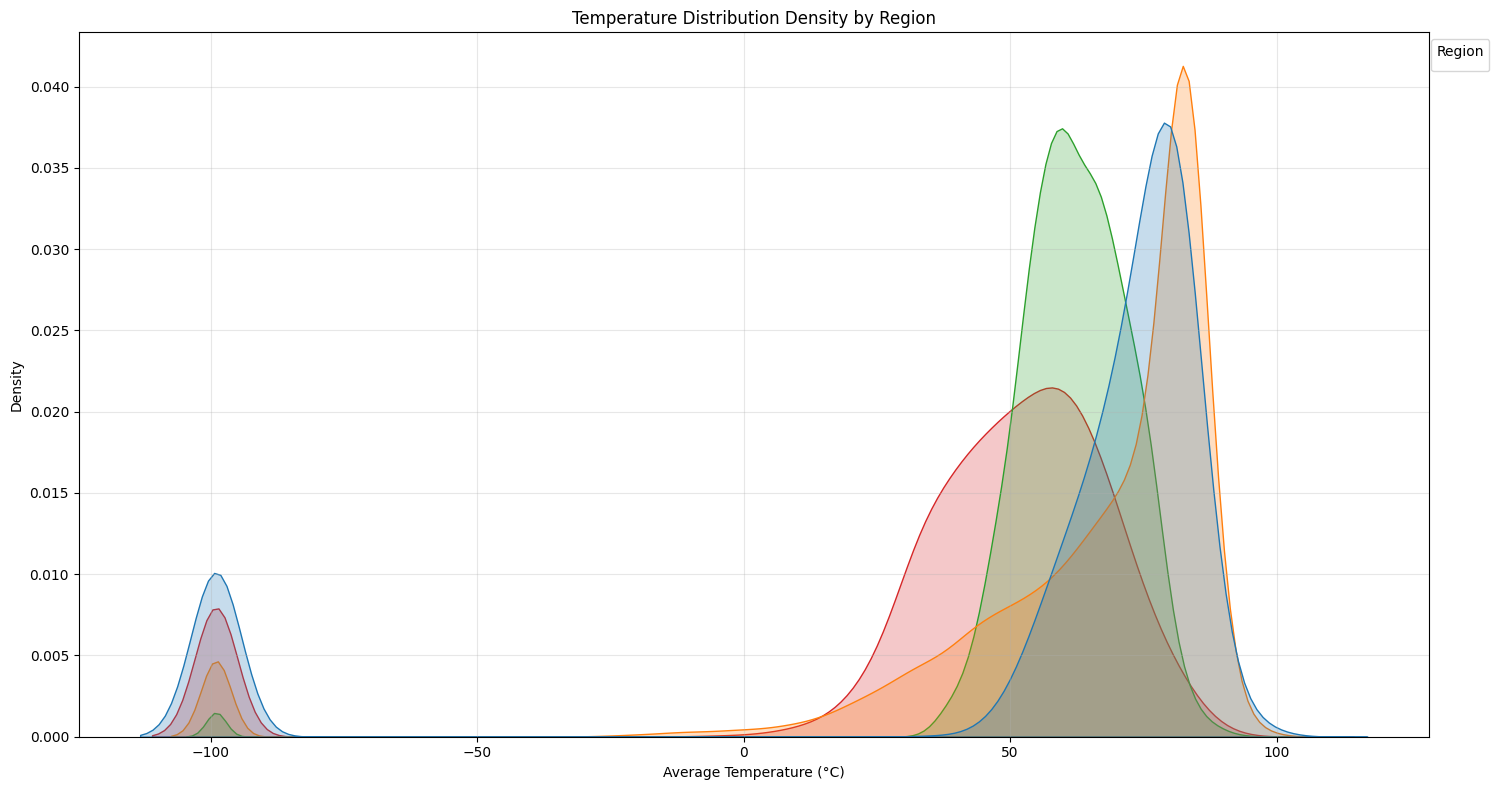

In [ ]:
def plot_continent_density():
    plt.figure(figsize=(15, 8))
    sns.kdeplot(data=df, x='AvgTemperature', hue='Region',
                fill=True, common_norm=False)
    plt.title('Temperature Distribution Density by Region')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Density')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Display the visualization
plot_continent_density()

8. How do temperatures vary across years and months simultaneously and
Are there any patterns in the relationship between time of year and temperature?

In [ ]:
def plot_3d_temp_scatter():
    # Create a copy and normalize temperatures for size
    plot_df = df.sample(5000).copy()
    plot_df['temp_size'] = plot_df['AvgTemperature'] - plot_df['AvgTemperature'].min() + 1

    fig = px.scatter_3d(plot_df,
                        x='Year',
                        y='Month',
                        z='AvgTemperature',
                        color='Region',
                        size='temp_size',
                        size_max=20,
                        opacity=0.7,
                        title='3D Temperature Distribution')

    fig.update_layout(
        scene=dict(
            xaxis_title='Year',
            yaxis_title='Month',
            zaxis_title='Average Temperature (°C)'
        ),
        width=1000,
        height=800
    )

    fig.update_traces(
        hovertemplate='Year: %{x}<br>Month: %{y}<br>Temperature: %{z}°C<br>Region: %{color}<extra></extra>'
    )

    fig.show()

# Display the visualization
plot_3d_temp_scatter()

9. What are the peak and trough months for temperature globally and also  What is the range of temperature variation throughout the year?

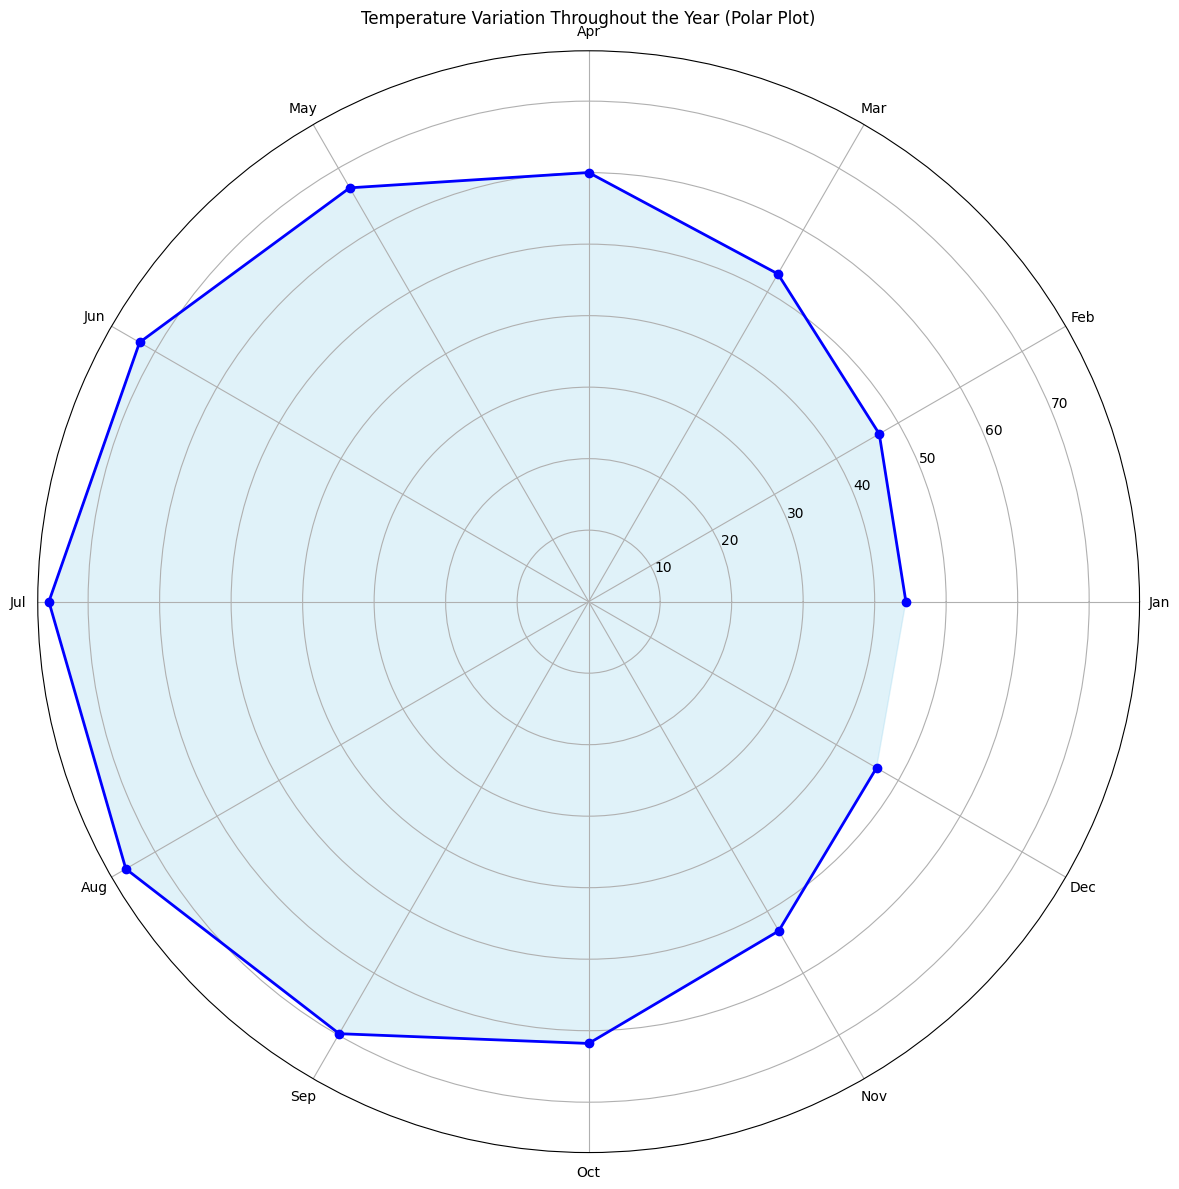


Monthly Temperature Statistics:
        mean   min    max
Month                    
1      44.37 -47.7   96.8
2      46.93 -49.1   93.7
3      52.93 -27.9  100.7
4      60.02  -2.3  102.8
5      66.83  19.4  104.9
6      72.52  30.7  109.9
7      75.49  32.2  109.9
8      74.74  33.1  110.0
9      69.77  22.4  106.9
10     61.78 -17.9   96.9
11     53.17 -36.0   93.2
12     46.49 -50.0   95.6


In [ ]:
df = df[df['AvgTemperature'] != -99]

def plot_seasonal_polar():
    # Calculate monthly averages
    monthly_avg = df.groupby('Month')['AvgTemperature'].mean()

    # Create polar plot
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='polar')

    # Convert months to angles
    theta = np.linspace(0, 2*np.pi, 12, endpoint=False)

    # Plot data
    ax.plot(theta, monthly_avg.values, 'o-', linewidth=2, color='blue')
    ax.fill(theta, monthly_avg.values, alpha=0.25, color='skyblue')

    # Set the labels
    ax.set_xticks(theta)
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.title('Temperature Variation Throughout the Year (Polar Plot)',
              pad=20)
    plt.tight_layout()
    plt.show()

# Run the function to display the plot
plot_seasonal_polar()

# Print some statistics about the monthly temperatures
print("\nMonthly Temperature Statistics:")
monthly_stats = df.groupby('Month')['AvgTemperature'].agg(['mean', 'min', 'max'])
print(monthly_stats.round(2))

10. How do mean temperatures compare to extremes for different cities?
and Are there cities that show unusually large gaps between maximum and minimum temperatures?

In [ ]:
def plot_city_temp_range():
    # Calculate temperature range for each city
    city_stats = df.groupby('City').agg({
        'AvgTemperature': ['mean', 'min', 'max']
    }).reset_index()

    city_stats.columns = ['City', 'Mean', 'Min', 'Max']
    city_stats['Range'] = city_stats['Max'] - city_stats['Min']

    # Sort by temperature range
    city_stats_sorted = city_stats.nlargest(15, 'Range')

    # Create the visualization
    fig = go.Figure()

    # Add traces for min, mean, and max temperatures
    fig.add_trace(go.Scatter(x=city_stats_sorted['City'],
                            y=city_stats_sorted['Max'],
                            name='Maximum',
                            mode='lines+markers',
                            line=dict(color='red')))

    fig.add_trace(go.Scatter(x=city_stats_sorted['City'],
                            y=city_stats_sorted['Mean'],
                            name='Mean',
                            mode='lines+markers',
                            line=dict(color='green')))

    fig.add_trace(go.Scatter(x=city_stats_sorted['City'],
                            y=city_stats_sorted['Min'],
                            name='Minimum',
                            mode='lines+markers',
                            line=dict(color='blue')))

    fig.update_layout(
        title='Temperature Range Analysis for Top 15 Cities',
        xaxis_title='City',
        yaxis_title='Temperature (°C)',
        xaxis_tickangle=45,
        showlegend=True,
        height=600,
        width=1000,
        margin=dict(l=50, r=50, t=50, b=50)
    )

    fig.show()

# Run the function to display the interactive plot
plot_city_temp_range()

# Print additional statistics
print("\nTop 15 Cities by Temperature Range:")
city_stats = df.groupby('City').agg({
    'AvgTemperature': ['mean', 'min', 'max']
}).reset_index()
city_stats.columns = ['City', 'Mean', 'Min', 'Max']
city_stats['Range'] = city_stats['Max'] - city_stats['Min']
print(city_stats.nlargest(15, 'Range')[['City', 'Range', 'Min', 'Max', 'Mean']].round(2))


Top 15 Cities by Temperature Range:
                     City  Range   Min    Max   Mean
110             Fairbanks  129.5 -50.0   79.5  28.45
300            Ulan-bator  124.7 -37.2   87.5  30.32
124           Great Falls  124.2 -24.1  100.1  45.11
314              Winnipeg  122.3 -35.7   86.6  37.81
111                 Fargo  120.9 -29.5   91.4  42.70
39               Bismarck  119.8 -28.1   91.7  43.29
241                Regina  119.7 -36.5   83.2  37.27
274           Sioux Falls  116.5 -22.2   94.3  46.67
192  Minneapolis St. Paul  115.8 -23.8   92.0  46.98
138                Helena  115.7 -26.4   89.3  45.36
102                Duluth  115.4 -29.8   85.6  40.41
36               Billings  112.6 -22.0   90.6  47.91
125             Green Bay  112.5 -21.2   91.3  45.78
104              Edmonton  112.0 -29.2   82.8  39.25
240            Rapid City  110.9 -19.0   91.9  46.91
